In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
preprocessed_df = pd.read_csv("file.csv")
preprocessed_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,-0.629341,1,0,0,...,0,1,0,0,0,0,0,0,0,1
796,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.436611,1,0,0,...,0,1,0,0,0,0,0,0,0,1
797,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,0.059310,1,0,0,...,1,0,0,0,0,0,0,0,0,1
798,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,0.403635,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [7]:
#2차원 군집 분석
from sklearn.cluster import KMeans

k:  1 | cost:  1599.9999999999998
k:  2 | cost:  853.3477298974244
k:  3 | cost:  643.9650698136966
k:  4 | cost:  480.49450250321513
k:  5 | cost:  403.97191765107124


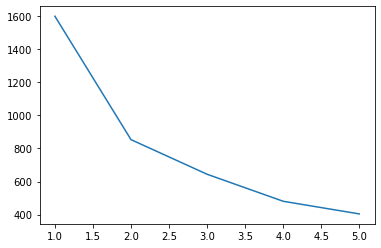

In [18]:
X = preprocessed_df[['Attack', 'Defense']]

k_list = []
cost_list = []

for k in range(1,6):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print("k: ", k,'| cost: ',interia)
    k_list.append(k)
    cost_list.append(interia)
plt.plot(k_list, cost_list)

In [20]:
#k가 4정도 인게 좋을거 같음

kmeans = KMeans(n_clusters=4).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df["cluster_num"] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,2
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,3
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
preprocessed_df["cluster_num"].value_counts()

2    309
0    253
1    128
3    110
Name: cluster_num, dtype: int64

In [ ]:
#군집 시각화

Text(0, 0.5, 'Defense')

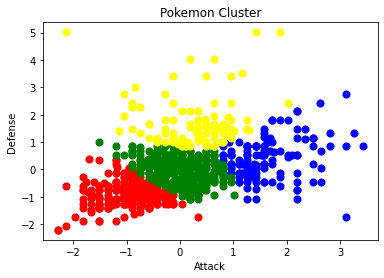

In [28]:
plt.scatter(preprocessed_df[preprocessed_df["cluster_num"]==0]["Attack"],
            preprocessed_df[preprocessed_df["cluster_num"]==0]["Defense"],
            s=50, c="red", label ="Pokemon Group1")
plt.scatter(preprocessed_df[preprocessed_df["cluster_num"]==1]["Attack"],
            preprocessed_df[preprocessed_df["cluster_num"]==1]["Defense"],
            s=50, c="blue", label ="Pokemon Group2")
plt.scatter(preprocessed_df[preprocessed_df["cluster_num"]==2]["Attack"],
            preprocessed_df[preprocessed_df["cluster_num"]==2]["Defense"],
            s=50, c="green", label ="Pokemon Group3")
plt.scatter(preprocessed_df[preprocessed_df["cluster_num"]==3]["Attack"],
            preprocessed_df[preprocessed_df["cluster_num"]==3]["Defense"],
            s=50, c="yellow", label ="Pokemon Group4")

plt.title("Pokemon Cluster")
plt.xlabel("Attack")
plt.ylabel("Defense")

k:  1 | cost:  4799.999999999999
k:  2 | cost:  3275.3812330305973
k:  3 | cost:  2862.057922495397
k:  4 | cost:  2566.7608880782186
k:  5 | cost:  2329.182470315044
k:  6 | cost:  2181.0596074234163
k:  7 | cost:  2061.004111815705
k:  8 | cost:  1961.6557418712946
k:  9 | cost:  1852.0744927918756
k:  10 | cost:  1767.2646226238462
k:  11 | cost:  1705.7801749043904
k:  12 | cost:  1642.34765721344
k:  13 | cost:  1576.2750979120124
k:  14 | cost:  1532.653076431002


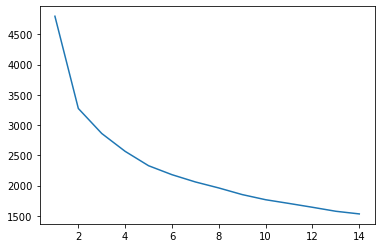

In [29]:
#다차원 분석

X = preprocessed_df[['HP','Attack', 'Defense','Sp. Atk','Sp. Def','Speed']]

k_list = []
cost_list = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print("k: ", k,'| cost: ',interia)
    k_list.append(k)
    cost_list.append(interia)
plt.plot(k_list, cost_list)

In [30]:
#k가 5정도 인게 좋을거 같음

kmeans = KMeans(n_clusters=5).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df["cluster_num"] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,4
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,4
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
preprocessed_df["cluster_num"].value_counts()

0    281
4    194
1    118
3    106
2    101
Name: cluster_num, dtype: int64

<AxesSubplot:xlabel='cluster_num', ylabel='HP'>

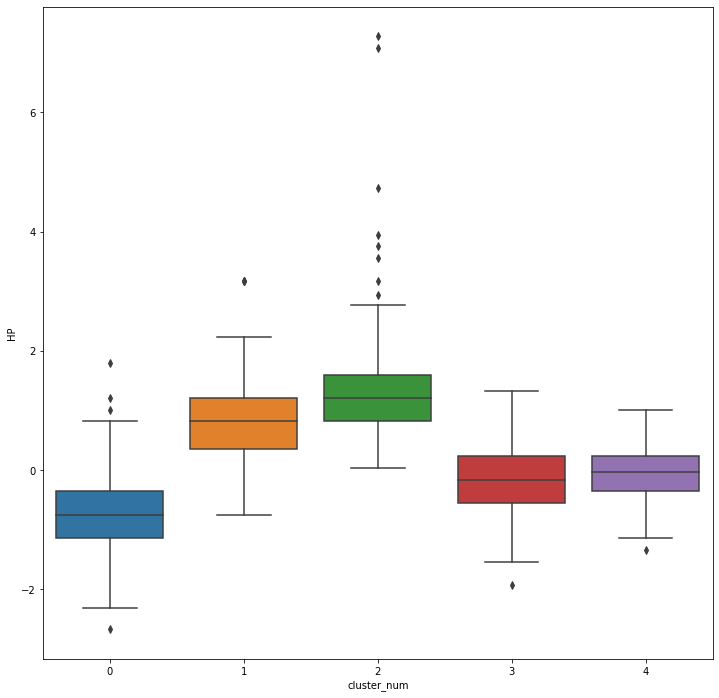

In [36]:
#군집별 특성 시각화

fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "HP", data = preprocessed_df)

<AxesSubplot:xlabel='cluster_num', ylabel='Attack'>

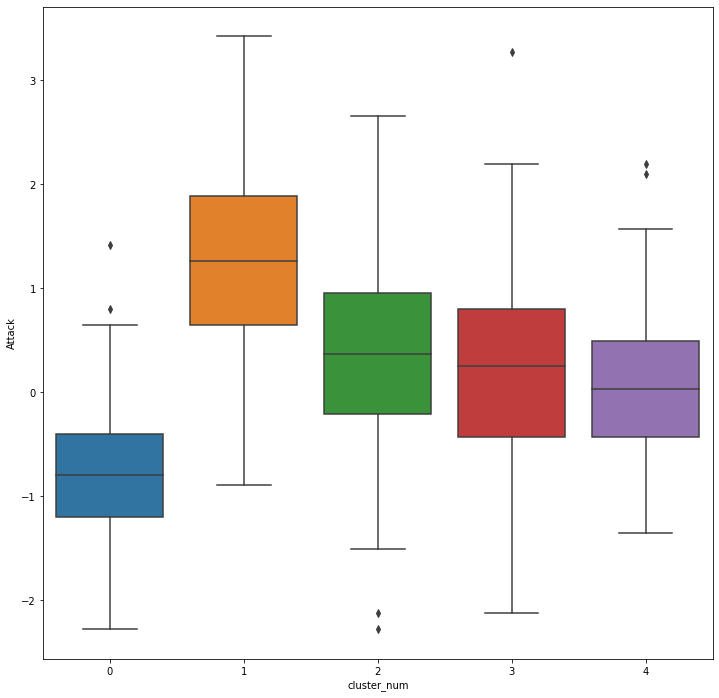

In [37]:
#군집별 특성 시각화

fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Attack", data = preprocessed_df)